In [76]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [77]:
# Grab and process the raw data.
yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
yelp_raw.columns = ['review', 'sentiment']
yelp_raw.head(100)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [95]:
keywords = ['never', 'bad', 'awful', 'not good', 'poor', 'worst', 'disappointing', 'disappointed', 'terrible','angry','disgust','blah', 'tasteless','petrified','hair','bland']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [88]:
#Determine words most associated with negative

negative = yelp_raw[yelp_raw['sentiment']== 0]

neg_list = [] 
                
for sentence in yelp_raw[yelp_raw['sentiment']== 0]['review'].tolist():
                    words = sentence.split(' ')
                    neg_list.extend(words)

counts = Counter(neg_list)

#Turn into Dataframe
negative_word_count = pd.DataFrame.from_dict(counts, orient='index')
negative_word_count.columns=['Count']

#Add length of word
negative_word_count['Length of word'] = negative_word_count.index.map(lambda x: len(x))

negative_word_count.sort_values(by=['Count'], inplace=True, ascending=False)
negative_word_count.head(50)

,Count,Length of word
and,218,3
the,214,3
was,137,3
I,113,1
a,107,1
is,104,2
The,95,3
to,84,2
in,54,2
of,51,2


In [89]:
#Determine words most associated with Positive

positive = yelp_raw[yelp_raw['sentiment']== 1]

pos_list = [] 
                
for sentence in yelp_raw[yelp_raw['sentiment']== 1]['review'].tolist():
                    words = sentence.split(' ')
                    pos_list.extend(words)

counts = Counter(pos_list)

#Turn into Dataframe
pos_word_count = pd.DataFrame.from_dict(counts, orient='index')
pos_word_count.columns=['Count']

#Add length of word
pos_word_count['Length of word'] = pos_word_count.index.map(lambda x: len(x))

pos_word_count.sort_values(by=['Count'], inplace=True, ascending=False)
pos_word_count.head(50)

,Count,Length of word
the,191,3
I,181,1
and,160,3
was,155,3
to,129,2
a,121,1
not,87,3
The,82,3
of,72,2
is,67,2


In [103]:
positive_words = [w for w in pos_list[:1000] if w not in neg_list[:1000]]
negative_words = [w for w in neg_list[:1000] if w not in pos_list[:1000]]
print(negative_words)

['Wow...', 'Loved', 'place.', 'Stopped', 'late', 'May', 'bank', 'holiday', 'Rick', 'Steve', 'recommendation', 'loved', 'it.', 'selection', 'great', 'prices.', 'fries', 'great', 'too.', 'A', 'great', 'touch.', 'prompt.', 'tried', 'Cape', 'Cod', 'ravoli,', 'chicken,with', 'cranberry...mmmm!', 'Highly', 'recommended.', 'amazing.', 'cute.', 'less...', 'interior', 'beautiful.', 'performed.', "That's", 'right....the', 'velvet', 'cake.....ohhh', 'stuff', 'hole', 'wall', 'has', 'great', 'Mexican', 'street', 'tacos,', 'staff.', 'Also', 'combos', 'burger,', 'fries,', 'beer', '23', 'decent', 'deal.', 'found', 'accident', 'happier.', 'Overall,', 'lot.', 'redeeming', 'inexpensive.', 'Ample', 'portions', 'prices.', 'first', 'visit', 'Hiro', 'delight!', 'shrimp', 'tender', 'moist.', 'On', 'positive', 'note,', 'server', 'attentive', 'provided', 'great', 'thing', 'prime', 'rib', 'dessert', 'section.', 'beef,', 'cooked', 'right.', 'If', 'sandwich', 'any', 'Firehouse!!!!!', 'side', 'Greek', 'Greek', 'tas

In [96]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 0)

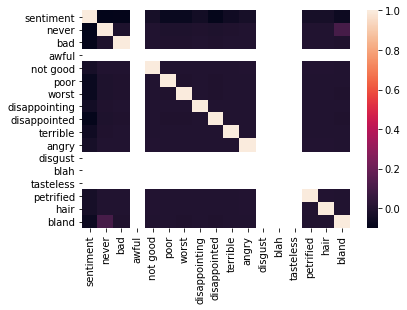

In [97]:
sns.heatmap(yelp_raw.corr())

In [98]:
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

In [99]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 445


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 59, 441],
       [  4, 496]], dtype=int64)

441 False positives, lets try to distinguish by using positive words instead 

In [104]:
keywords2 = ['loved', 'great','good', 'best', 'tasty', 'wow', 'selection', 'recomend', 'recommended', 'amazing','fantastic', 'above', 'glad', 'prompt'] 
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ) 

In [109]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 1)

In [111]:
data = yelp_raw[keywords2]
target = yelp_raw['sentiment']
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 403


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[115, 385],
       [ 18, 482]], dtype=int64)